## Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing Data

In [279]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [280]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [281]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [282]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [283]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [284]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Quality Checks

In [285]:
#Check the number of null values in the columns
leads_data.isnull().sum()/len(leads_data) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [286]:
leads_data['Country'].value_counts()/len(leads_data) * 100
## 70% of the data belongs to India , can ignore this feature

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [287]:
# checking for Specialization
leads_data['Specialization'].value_counts()/len(leads_data) * 100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [288]:
#creating a copy of the original DF
leads_df = leads_data.copy()

leads_df['Specialization'] = leads_df['Specialization'].replace('Select', 'Other')
## assigning 'Other' to select

In [289]:
## Further grouping the above 
#1. Finance and Banking
#2. Management (Combine similar management specializations)
#3. Marketing and Advertising
#4. IT and Project Management
#5. Supply Chain and Operations
#6. Travel, Tourism, and Hospitality
#7. International Business
#8. Healthcare Management
#9. Retail and E-commerce
#10. Services Excellence
#11. Agriculture and Rural Business

# assigning null values to other

leads_df['Specialization'].fillna('Other', inplace=True)

group_mapping = {
    'Finance Management': 'Finance and Banking',
    'Banking, Investment And Insurance': 'Finance and Banking',
    'Human Resource Management': 'Management',
    'Marketing Management': 'Management',
    'Operations Management': 'Management',
    'Business Administration': 'Management',
    'Healthcare Management': 'Management',
    'Hospitality Management': 'Management',
    'Retail Management': 'Management',    
    'IT Projects Management': 'IT and Projects',    
    'Supply Chain Management': 'Supply Chain and Operations',    
    'Media and Advertising': 'Media and Advertising',    
    'International Business': 'International Business',    
    'E-COMMERCE': 'E-commerce and Business',
    'E-Business': 'E-commerce and Business',    
    'Travel and Tourism': 'Travel and Tourism',   
    'Rural and Agribusiness': 'Rural and Agribusiness',    
    'Services Excellence': 'Other Services',
    'Other': 'Other Services' 
}


# Apply the grouping to create a new 'Grouped_Specialization' column
leads_df['Grouped_Specialization'] = leads_df['Specialization'].replace(group_mapping)


In [290]:
leads_df['Grouped_Specialization'].value_counts()

Other Services                 3420
Management                     2965
Finance and Banking            1314
IT and Projects                 366
Supply Chain and Operations     349
Media and Advertising           203
Travel and Tourism              203
International Business          178
E-commerce and Business         169
Rural and Agribusiness           73
Name: Grouped_Specialization, dtype: int64

In [291]:
## assigning 'Other' to select
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace('Select', 'Other')

# assigning null values to other
leads_df['How did you hear about X Education'].fillna('Other', inplace=True)

# rename column
leads_df.rename(columns={'How did you hear about X Education': 'Hear_Source'}, inplace=True)

In [292]:
leads_df['What is your current occupation'].value_counts()

# assigning null values to other
leads_df['What is your current occupation'].fillna('NA', inplace=True)

# rename column
leads_df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

In [293]:
# converting these to binary values 0 and 1 

# Search
# Magazine
# Newspaper Article
# X Education Forums
# Newspaper
# Digital Advertisement

# List of variables to map

varlist =  ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [294]:
leads_df.isna().sum()/len(leads_df) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
Hear_Source                                       0.000000
Occupation                                        0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [295]:
# dropping unnecessary cols - containing high missing values and irrelevant to this case study
#country- high missing and mostly skewed to India data
#What matters most to you in choosing a course - irrelevant info and missing data

In [296]:
leads_df.drop(['Country','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','I agree to pay the amount through cheque','Last Notable Activity','Specialization'],axis=1,inplace=True)

In [297]:
#checking again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9137 non-null   obje

In [298]:
#further cleaning and grouping data 
#Lead Source
leads_df['Lead Source'].fillna('NA', inplace=True)

source_mapping = {
    'Search Engines': ['Google', 'Organic Search', 'bing', 'google', 'Yahoo'],
    'Website': ['Welingak Website', 'welearnblog_Home', 'WeLearn', 'blog'],
    'Chat': ['Olark Chat', 'Live Chat'],
    'Referral': ['Reference', 'Referral Sites'],
    'Social Media': ['Facebook', 'Social Media', 'youtubechannel'],
    'Others': ['Direct Traffic', 'Click2call', 'Press_Release', 'testone', 'Pay per Click Ads', 'NC_EDM','NA']
}

# Create a new column for grouped lead sources
leads_df['Grouped_Lead_Source'] = leads_df['Lead Source'].apply(
    lambda x: next((group for group, sources in source_mapping.items() if x in sources), 'Others')
)

leads_df.drop(['Lead Source'],axis=1,inplace=True)

In [299]:
# Convert 'TotalVisits' to numeric and replace any non-numeric values with NaN
leads_df['TotalVisits'] = pd.to_numeric(leads_df['TotalVisits'], errors='coerce')

# Convert 'Total Time Spent on Website' to numeric and replace any non-numeric values with NaN
leads_df['Total Time Spent on Website'] = pd.to_numeric(leads_df['Total Time Spent on Website'], errors='coerce')

# Convert NaN to 0 for the columns
leads_df[['TotalVisits', 'Total Time Spent on Website']] = leads_df[['TotalVisits', 'Total Time Spent on Website']].fillna(0).astype(int)


In [337]:
leads_df['Page Views Per Visit'].fillna(0,inplace=True)

In [300]:
# converting these to binary values 0 and 1 
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [301]:
# City
leads_df['City'] = leads_df['City'].replace('Select','Other Cities')

In [302]:
leads_df['City'].fillna('Other Cities',inplace=True)

In [303]:
leads_df['Last Activity'].fillna('Unknown',inplace=True)

In [304]:
# dropping prospect ID as irrelevant

leads_df.drop(['Prospect ID'],axis=1,inplace=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Categorical Variables


In [306]:
#checking categorical columns
c_col = [i for i in leads_df.columns if leads_df[i].dtype == "object"]
[i for i in leads_df.columns if i in c_col]

['Lead Origin',
 'Last Activity',
 'Hear_Source',
 'Occupation',
 'Through Recommendations',
 'City',
 'Grouped_Specialization',
 'Grouped_Lead_Source']

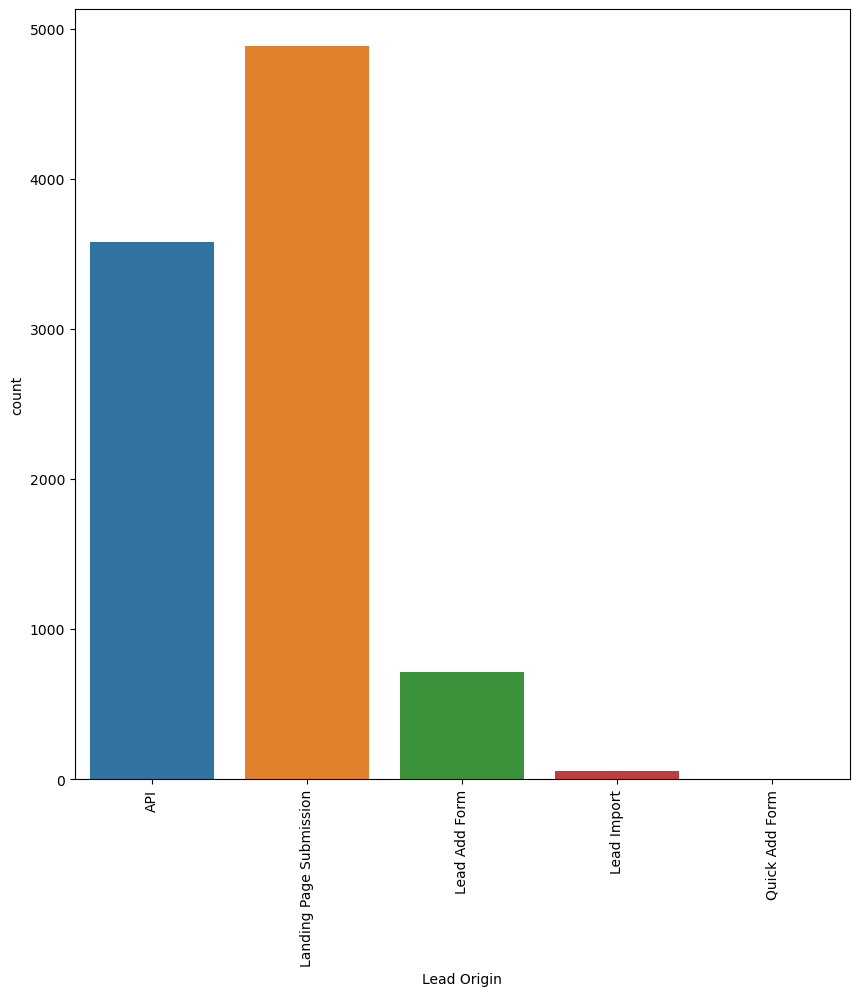

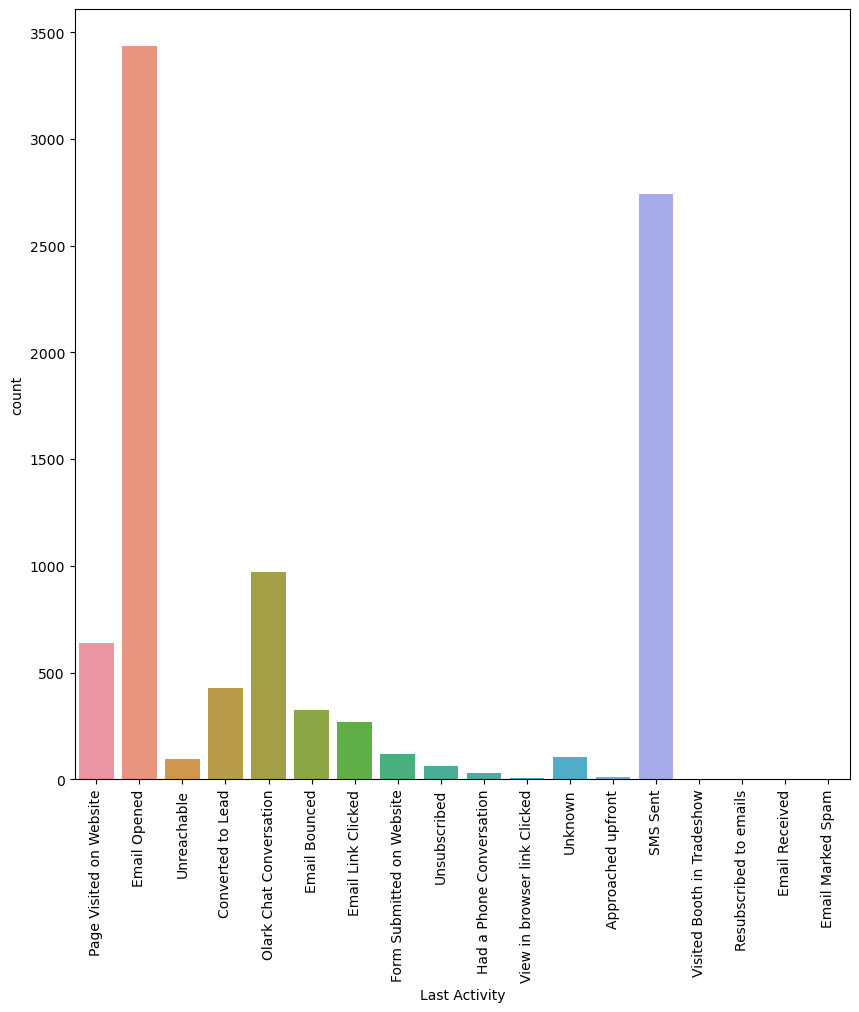

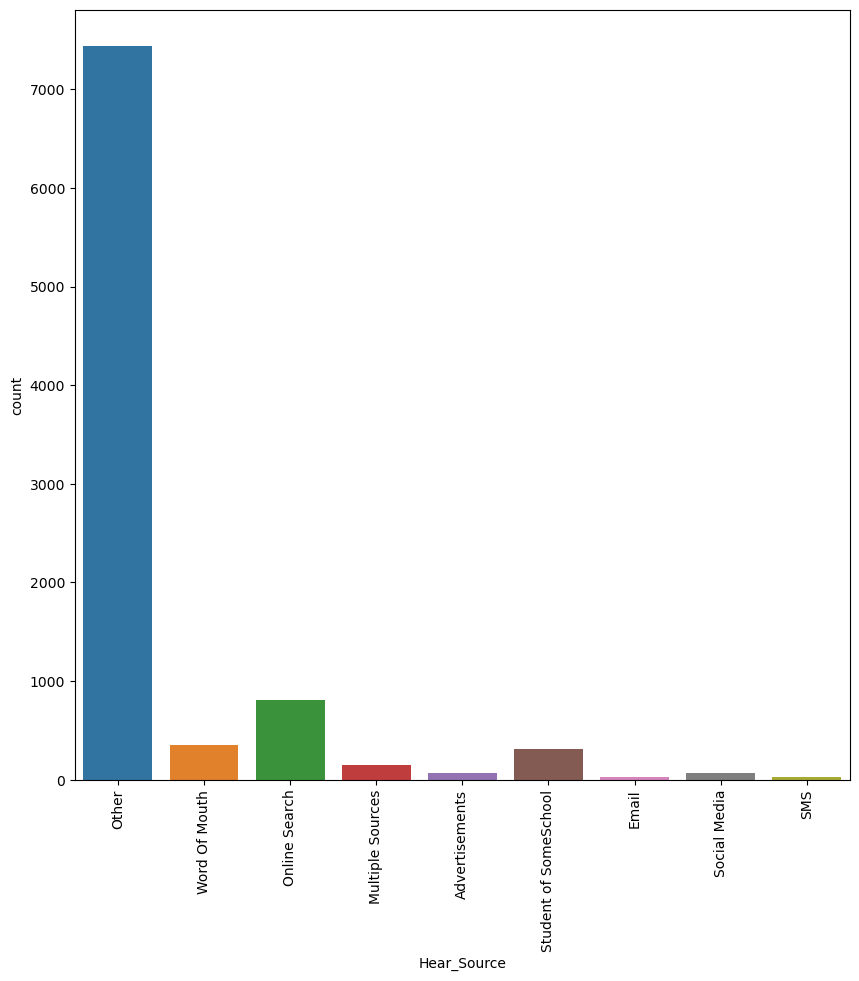

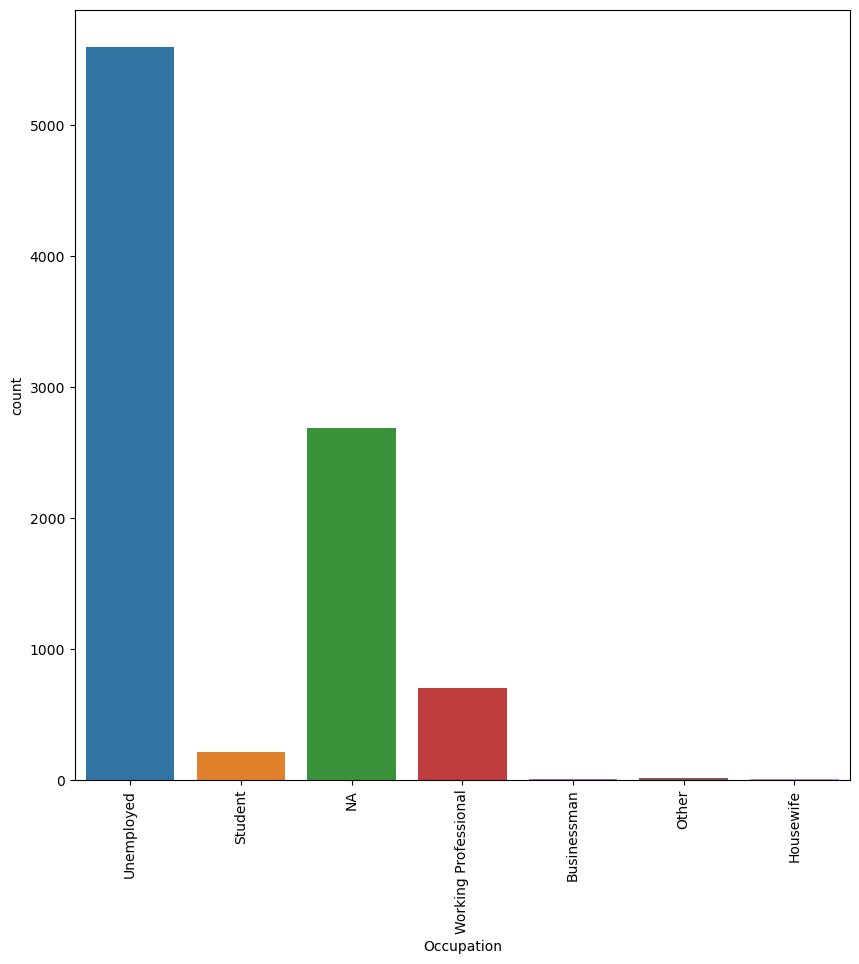

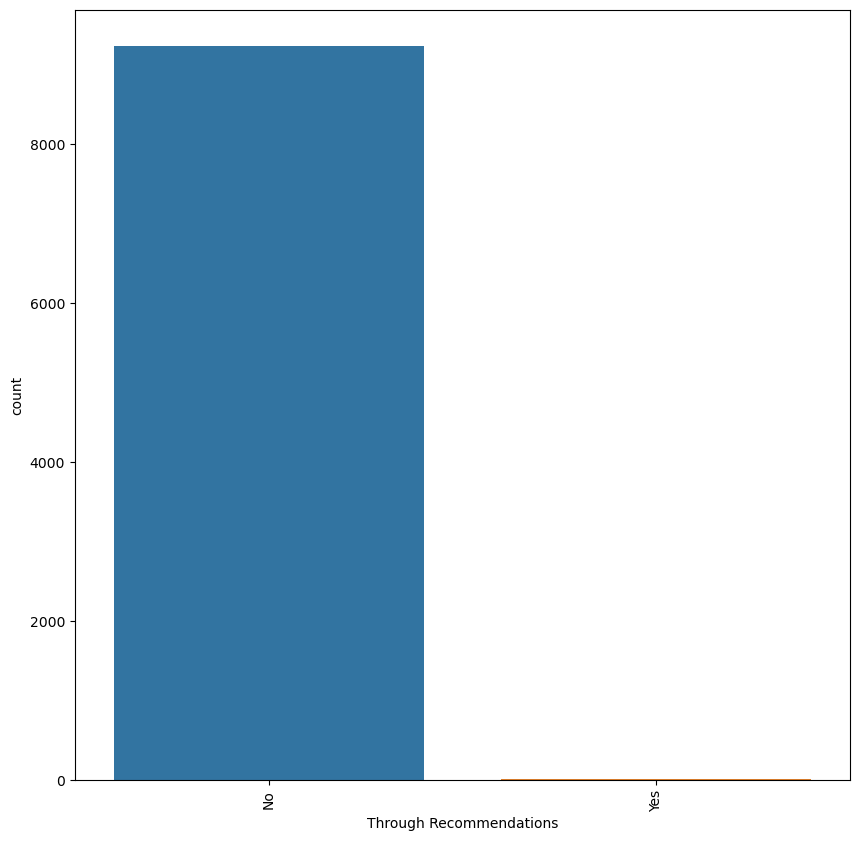

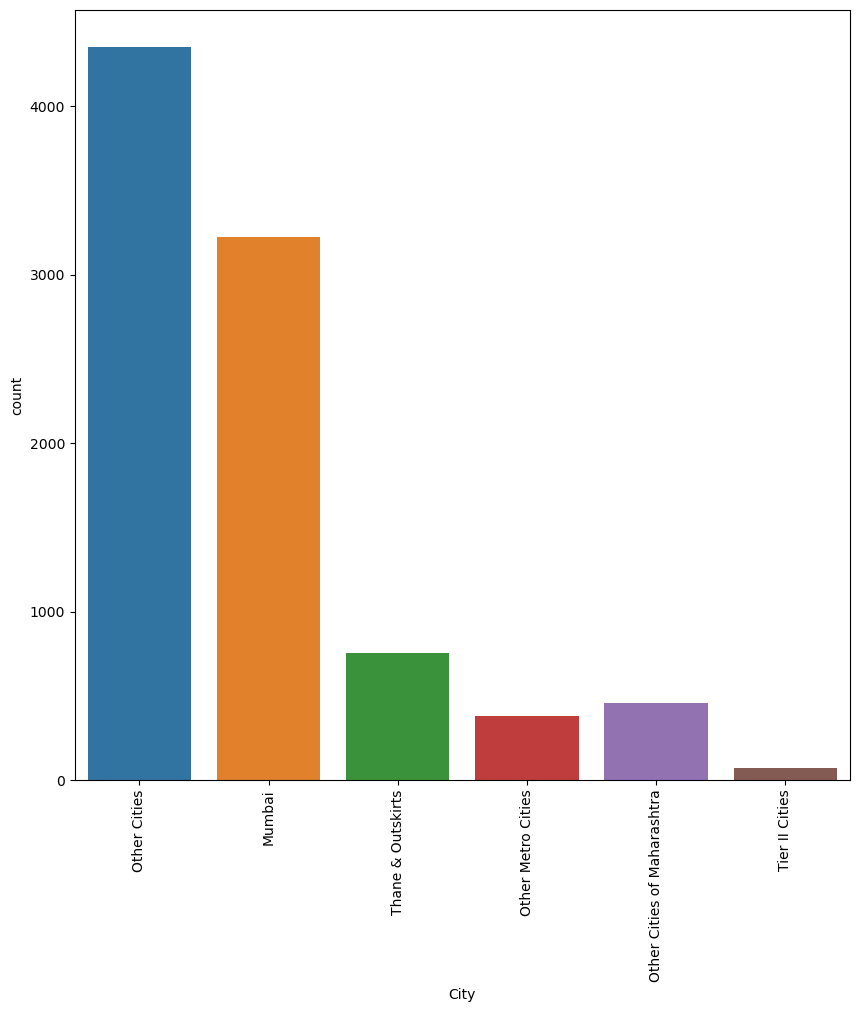

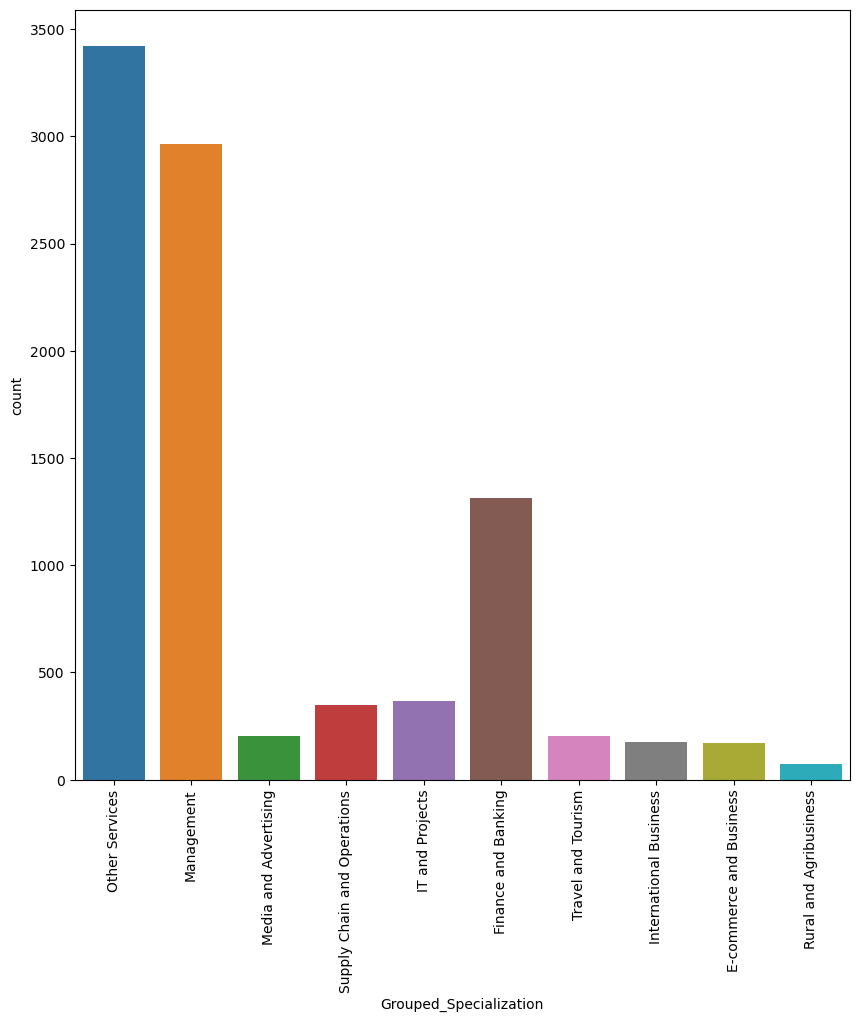

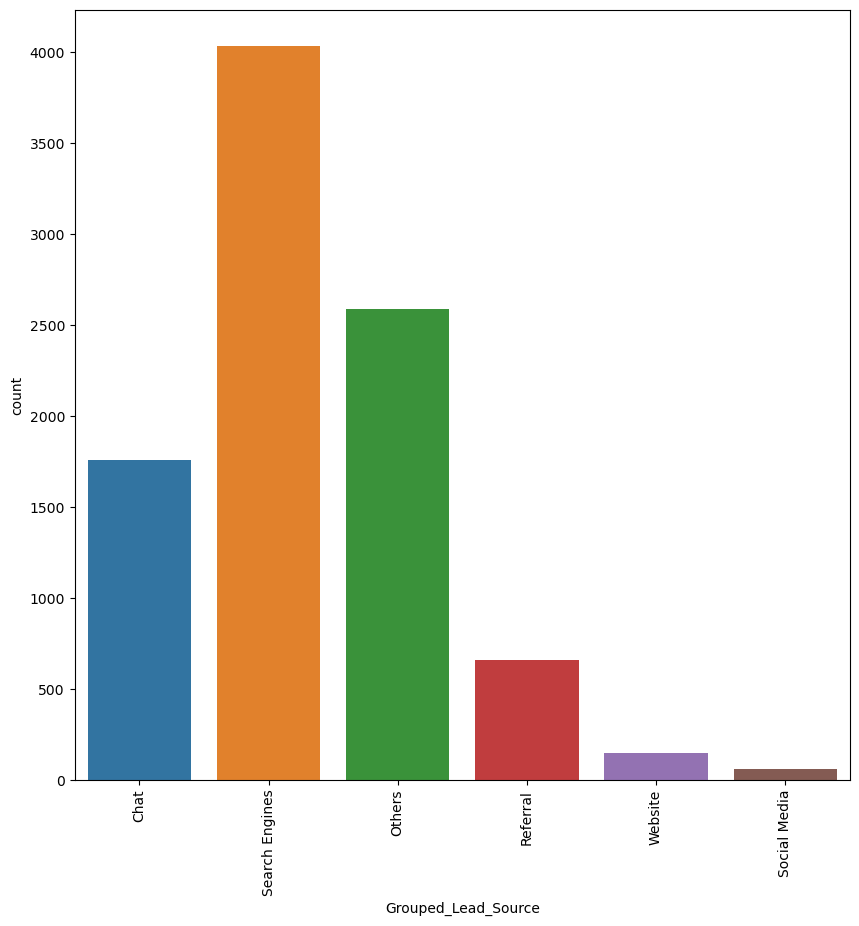

In [307]:
for i in c_col:
    plt.figure(figsize=(10,10))
    sns.countplot(data = leads_df , x = i)
    plt.xticks(rotation=90)
    plt.show()

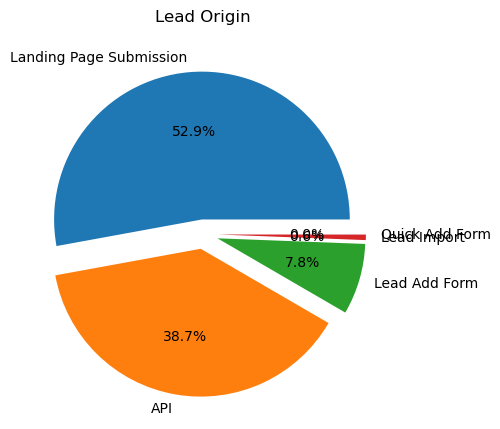

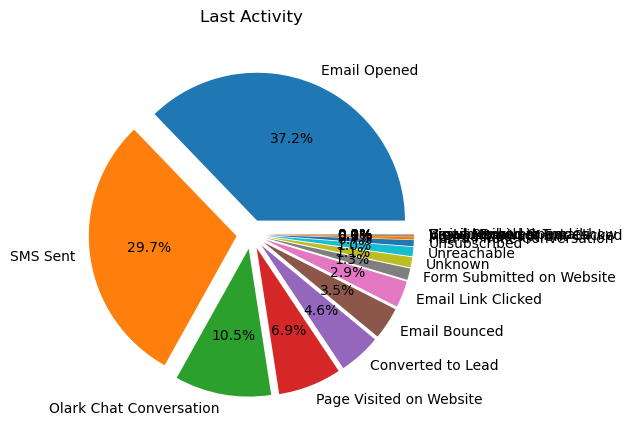

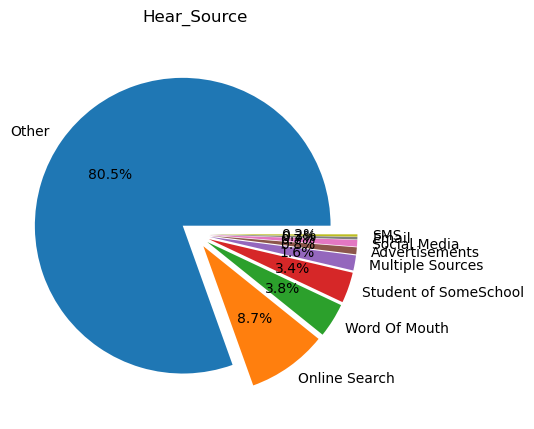

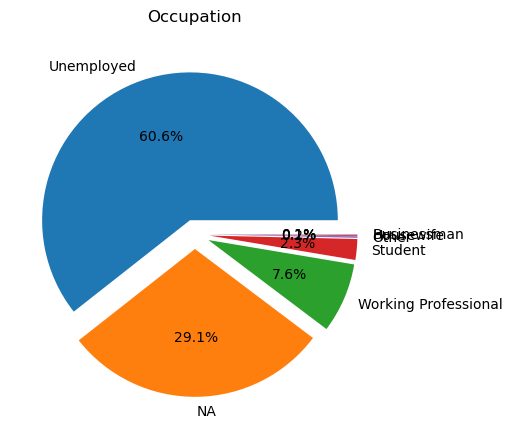

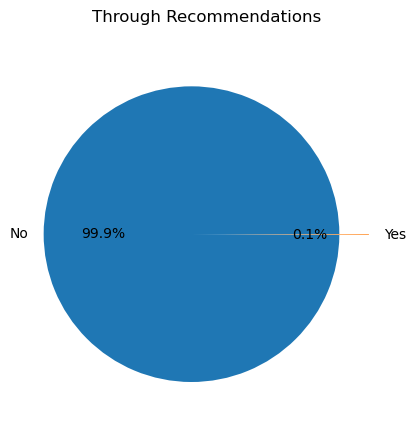

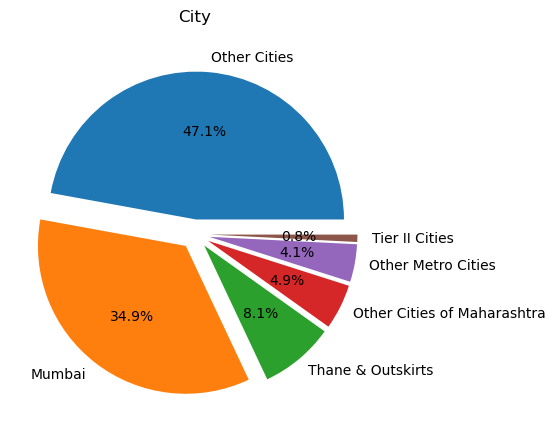

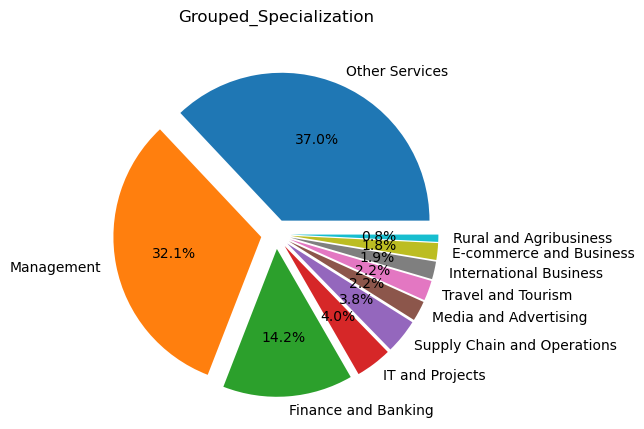

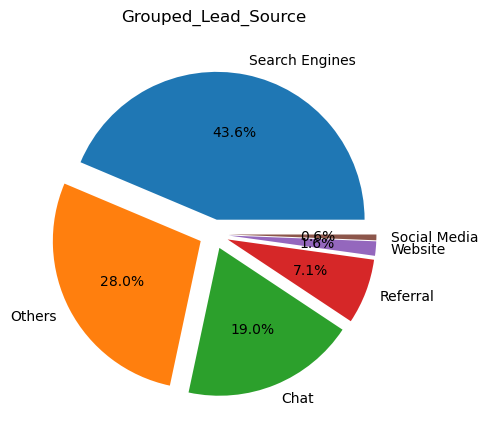

In [308]:
for i in c_col:
    d = leads_df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%',explode=[0.1] * len(leads_df[i].unique()))
    d.set_title('')
    plt.title(i, pad=20) 
    plt.ylabel("")
    plt.show()


In [309]:
#dropping through recommendations column as its highly skewed
leads_df.drop(['Through Recommendations'],axis=1,inplace=True)

###  Numerical univariate analysis 

In [310]:
c_col = [i for i in leads_df.columns if leads_df[i].dtype in ['int','float'] and i!='Lead Number']
l = [i for i in leads_df.columns if i in c_col]
l

['Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'A free copy of Mastering The Interview']

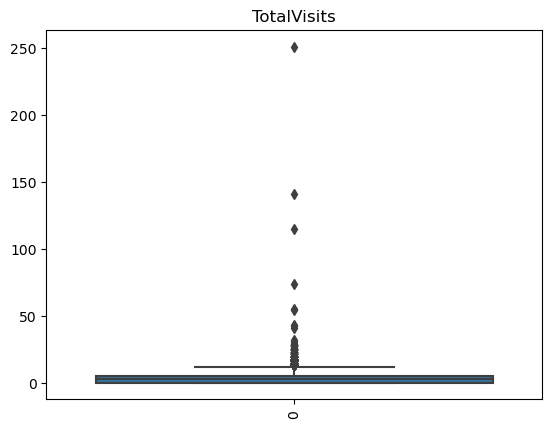

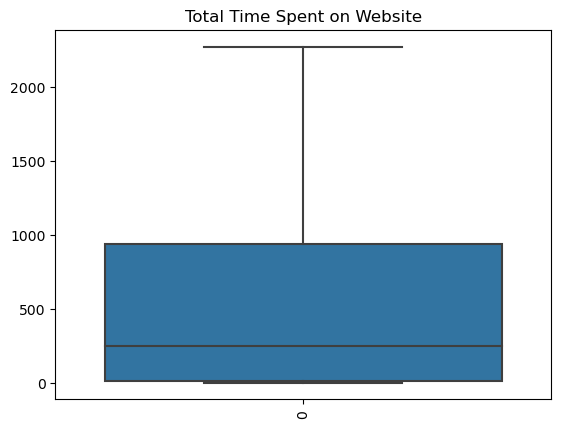

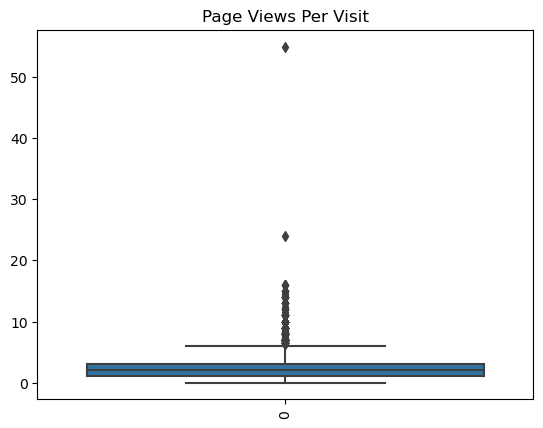

In [311]:
c_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in c_col:
    sns.boxplot(leads_df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [312]:
#Outliers are present in dataset 
#quantile([0.25, 0.50, 0.75])
leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].agg(['min','max','median','mean'])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
min,0.000000,0.000000,0.00000
max,251.000000,2272.000000,55.00000
median,3.000000,248.000000,2.00000
mean,3.394156,487.698268,2.36282


In [313]:
leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].quantile([0.25, 0.50, 0.75])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.25,0.0,12.0,1.0
0.50,3.0,248.0,2.0
0.75,5.0,936.0,3.0


In [314]:
leads_df[leads_df['TotalVisits']>50]['TotalVisits'].value_counts()

55     1
141    1
74     1
54     1
115    1
251    1
Name: TotalVisits, dtype: int64

In [315]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Hear_Source                             9240 non-null   object 
 10  Occupation                              9240 non-null   obje

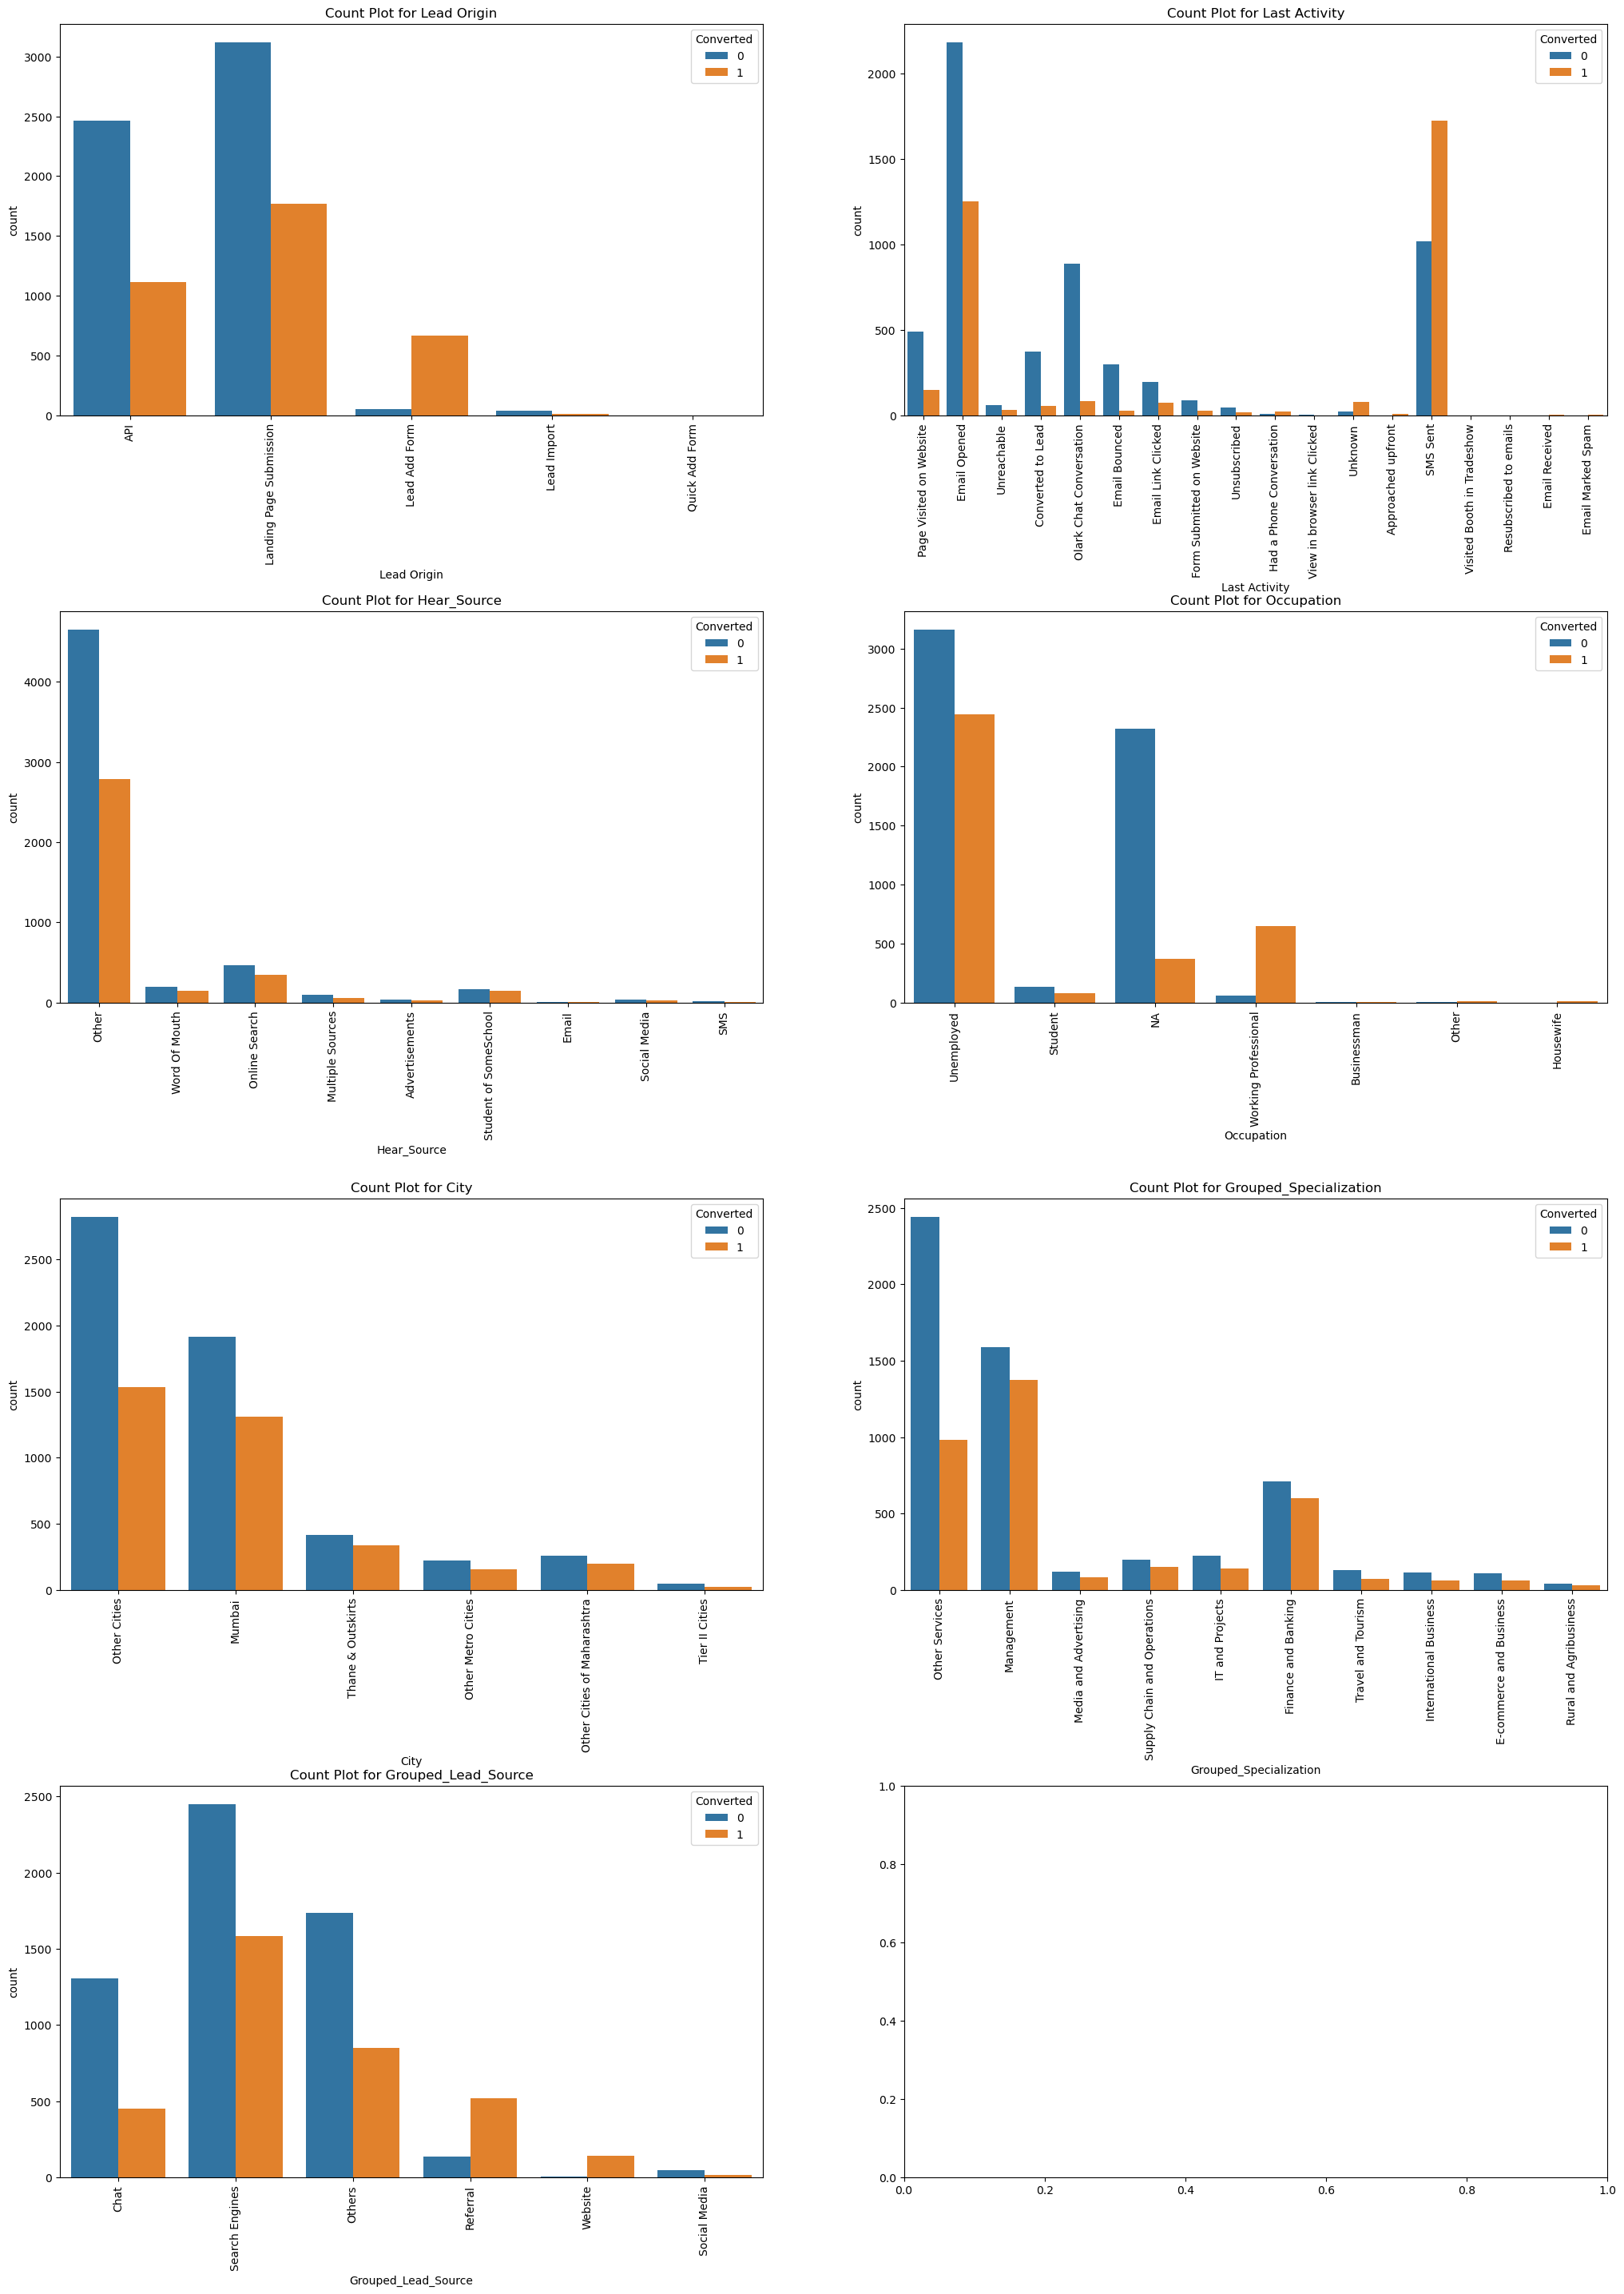

In [316]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 35))
fig.subplots_adjust(hspace=0.5)

# List of categorical features
categorical_features = ['Lead Origin', 'Last Activity', 'Hear_Source', 'Occupation', 'City', 'Grouped_Specialization', 'Grouped_Lead_Source']

# Loop through each feature and create count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Converted', data=leads_df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Count Plot for {feature}')
    axes[i // 2, i % 2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot

plt.show()


In [317]:
#Observation 
#Landing Page submission and API have high conversion count and lowest is Quick Ad form
#Those with email opened and sms sent have high converted count
#Unemployed and working professionals have high count of being converted
#People belonging to Mumbai and Other cities have high conversion count and Tier 2 cities have the lowest
#Management and Fianance and Banking have highest conversion count and Rural and Agribusiness have the lowest
#Referral and Search Engine have high conversion count , social meadia has the lowest.

In [318]:
#reducing dimensionality of Last Activity

# Define a mapping for grouping similar activities
activity_mapping = {
    'Email Opened': 'Email Actions',
    'SMS Sent': 'Communication',
    'Olark Chat Conversation': 'Communication',
    'Page Visited on Website': 'Website Interaction',
    'Converted to Lead': 'Lead Conversion',
    'Email Bounced': 'Email Actions',
    'Email Link Clicked': 'Email Actions',
    'Form Submitted on Website': 'Website Interaction',
    'Unknown': 'Other',
    'Unreachable': 'Other',
    'Unsubscribed': 'Email Actions',
    'Had a Phone Conversation': 'Communication',
    'Approached upfront': 'Communication',
    'View in browser link Clicked': 'Email Actions',
    'Email Received': 'Email Actions',
    'Email Marked Spam': 'Email Actions',
    'Visited Booth in Tradeshow': 'Event Participation',
    'Resubscribed to emails': 'Email Actions'
}

# Map the original 'Last Activity' column to the new grouped categories
leads_df['Grouped_Last_Activity'] = leads_df['Last Activity'].map(activity_mapping)
leads_df.drop(['Last Activity'],axis=1,inplace=True)

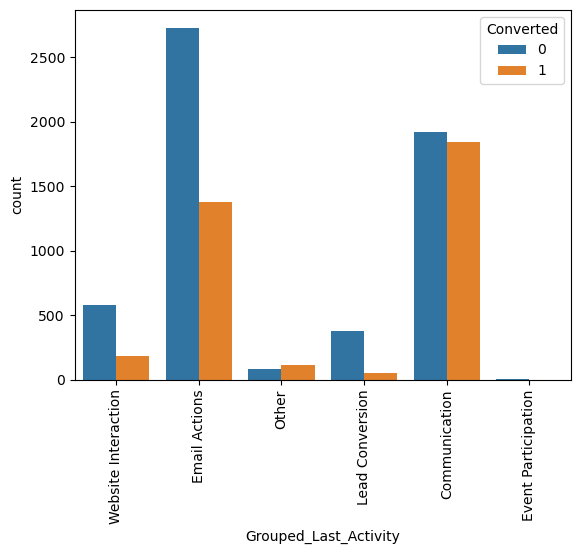

In [319]:
sns.countplot(x='Grouped_Last_Activity', hue='Converted', data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [320]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Hear_Source                             9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Search                                  9240 non-null   int6

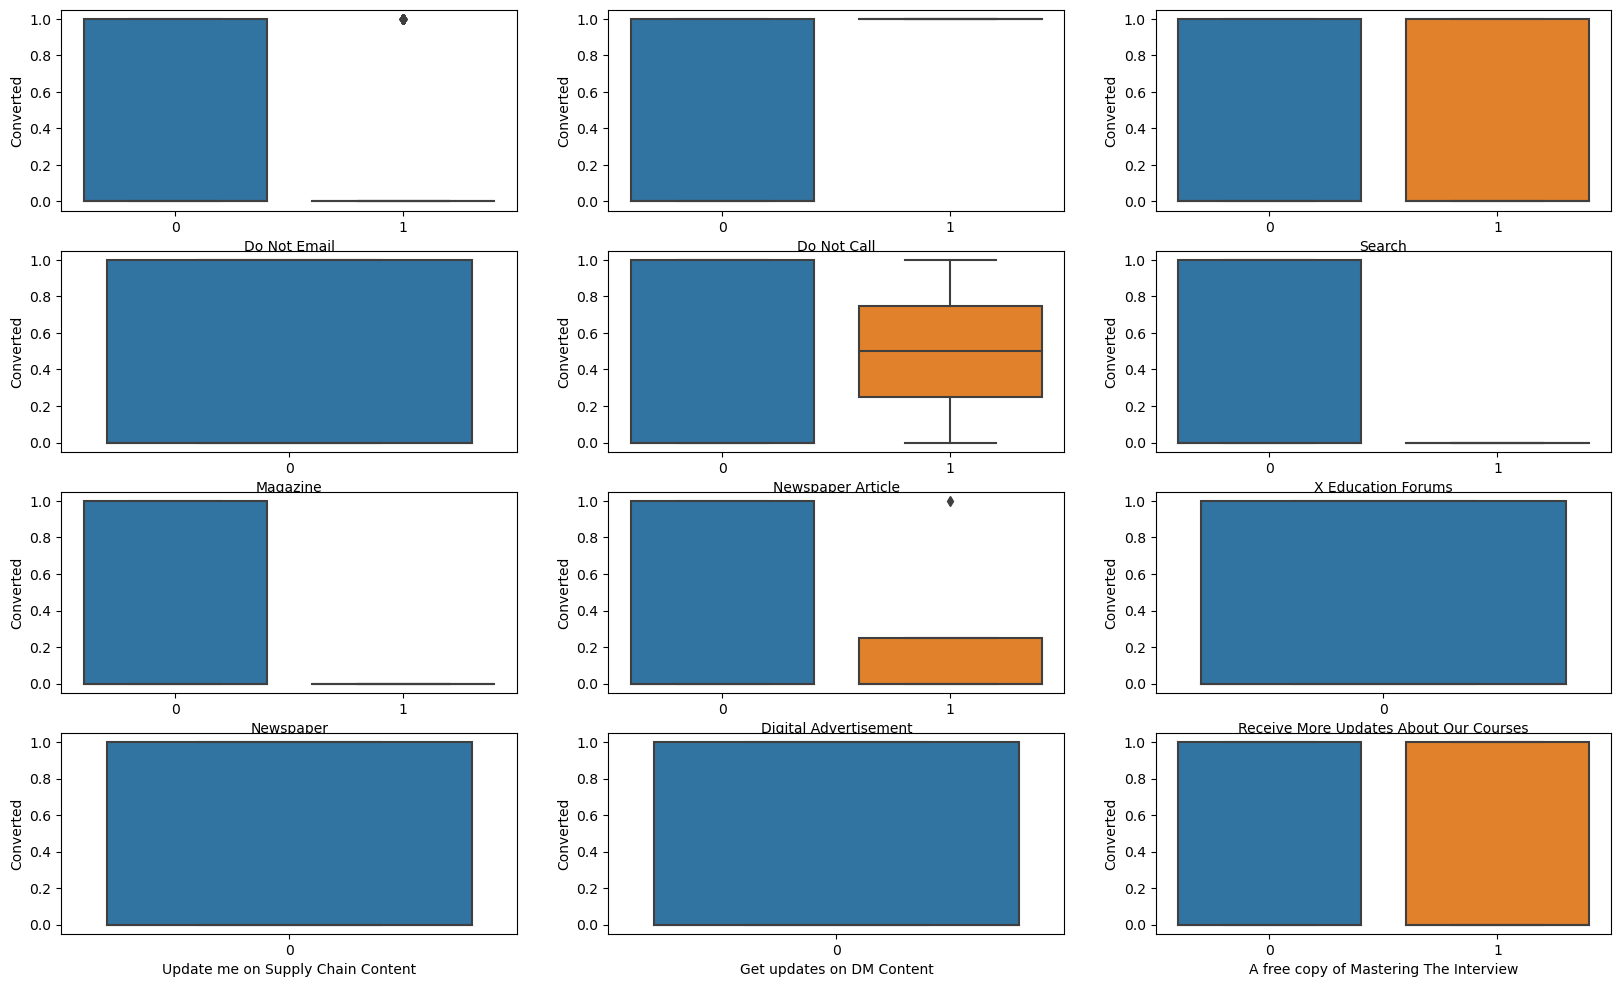

In [321]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = leads_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'Do Not Call', y = 'Converted', data = leads_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'Search', y = 'Converted', data = leads_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'Magazine', y = 'Converted', data = leads_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'Newspaper Article', y = 'Converted', data = leads_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'X Education Forums', y = 'Converted', data = leads_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'Newspaper', y = 'Converted', data = leads_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'Digital Advertisement', y = 'Converted', data = leads_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'Receive More Updates About Our Courses', y = 'Converted', data = leads_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'Update me on Supply Chain Content', y = 'Converted', data = leads_df)
plt.subplot(4,3,11)
sns.boxplot(x = 'Get updates on DM Content', y = 'Converted', data = leads_df)
plt.subplot(4,3,12)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = leads_df)

plt.show()


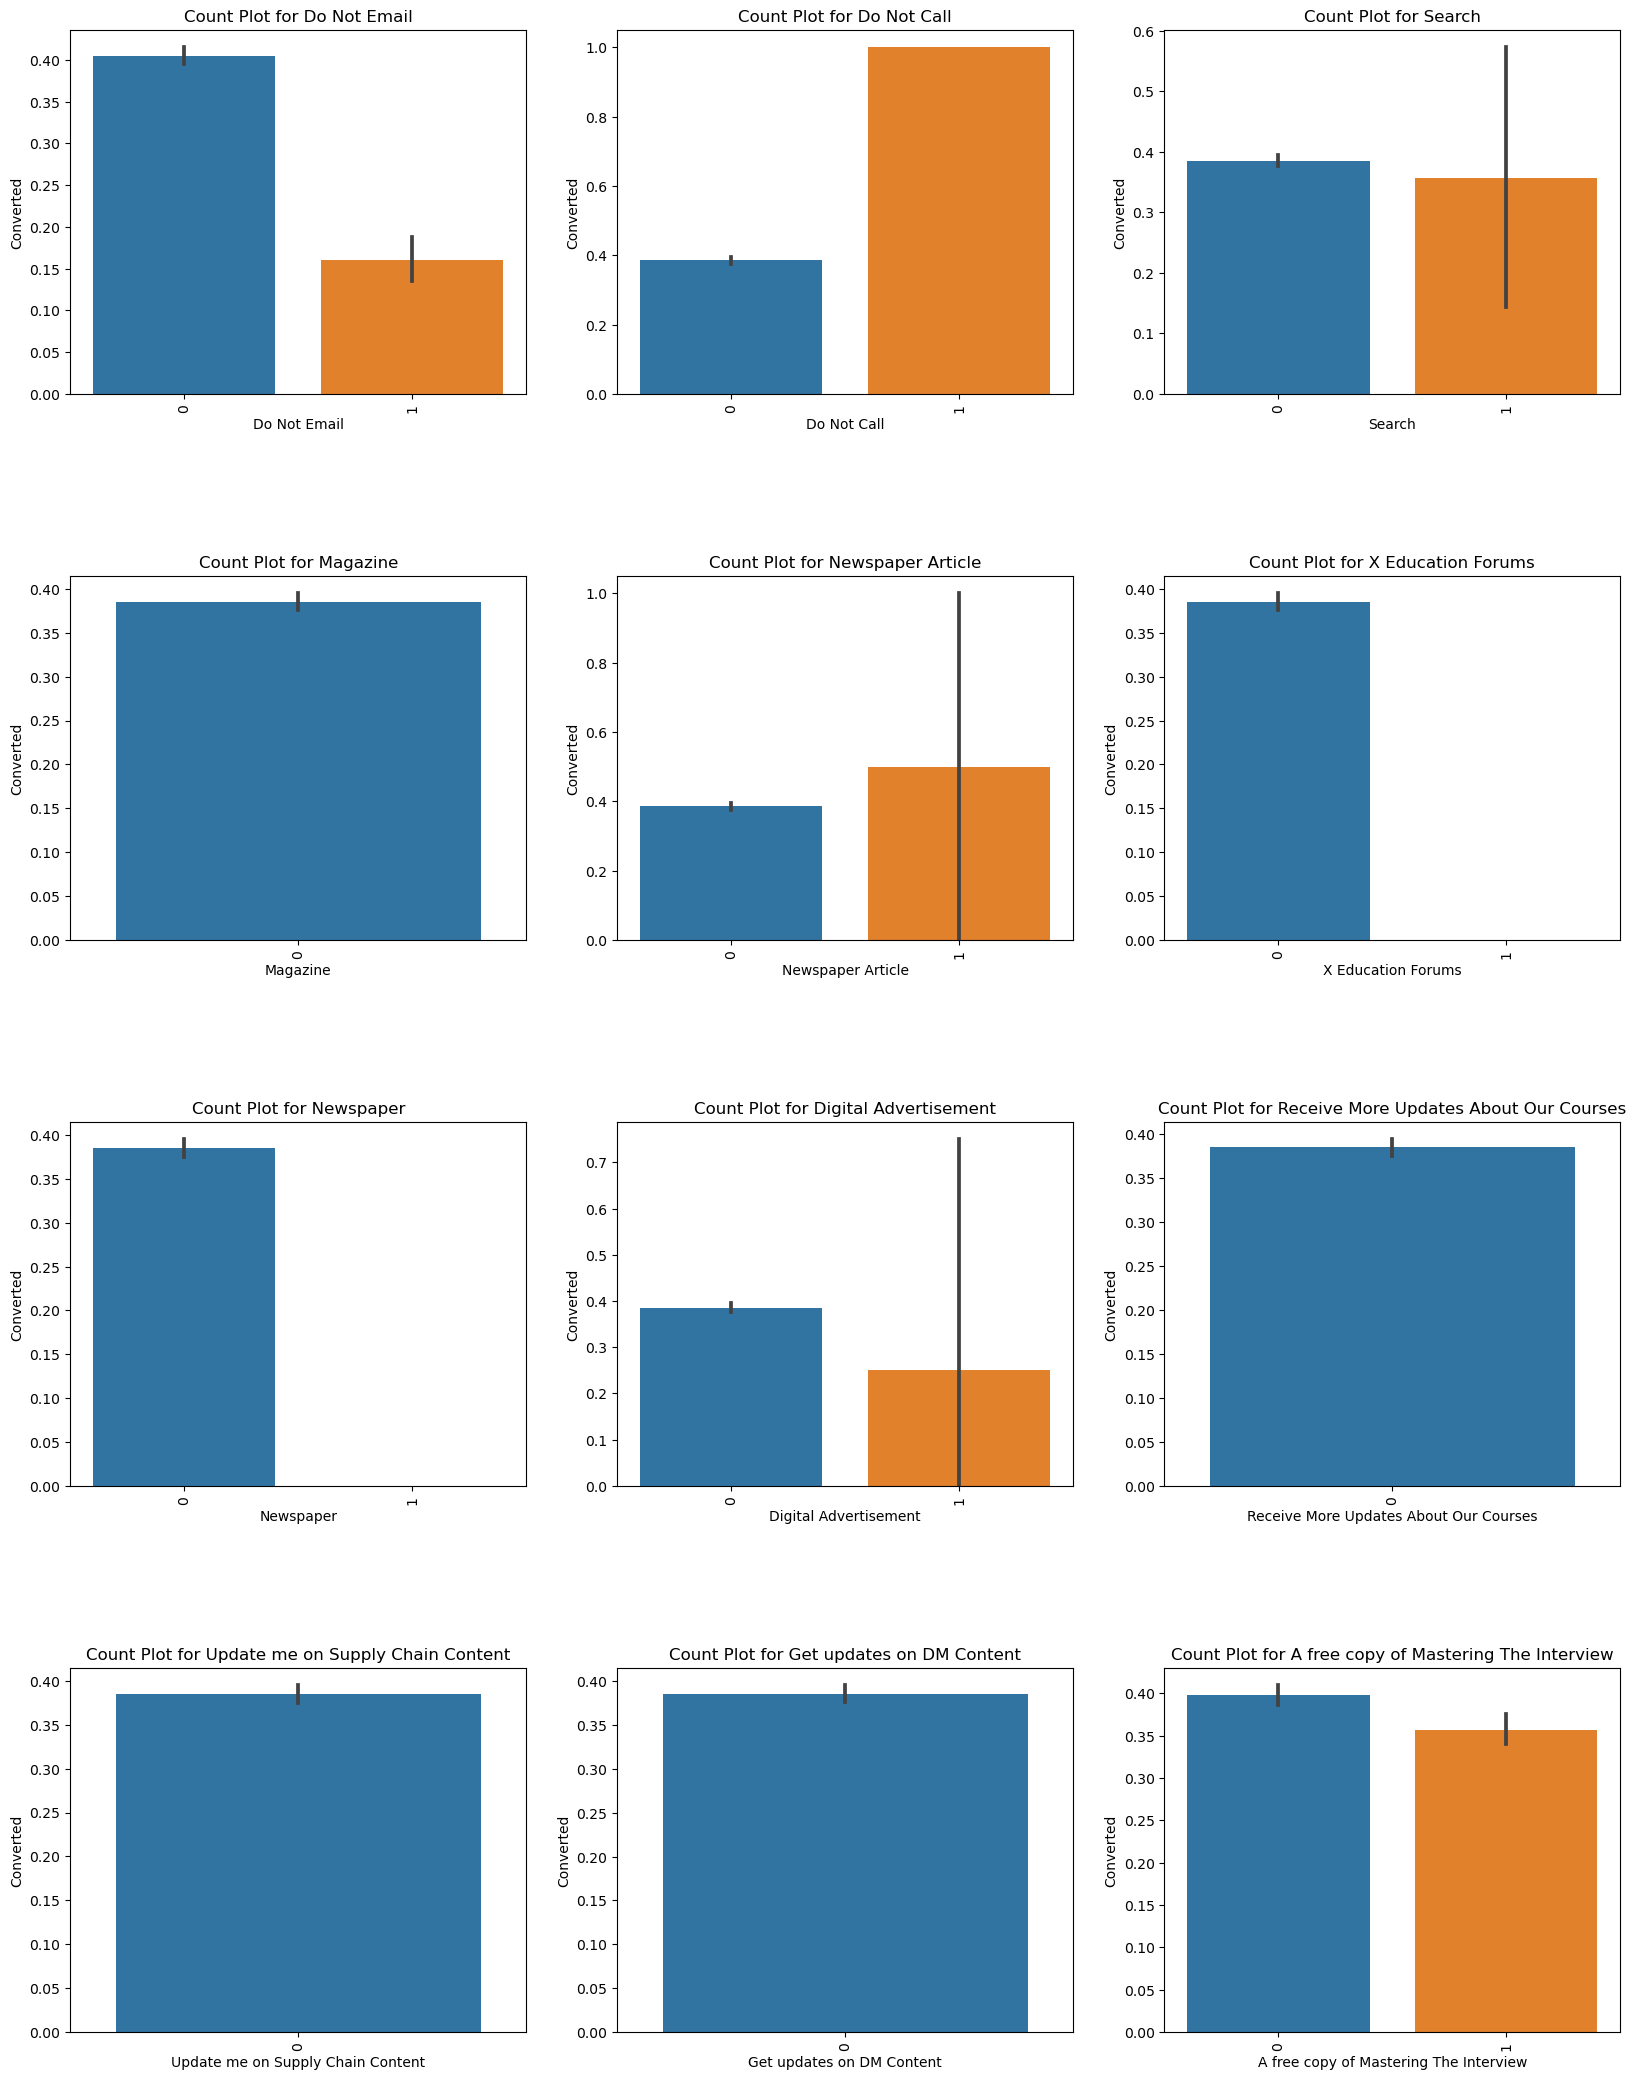

In [322]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 26))
fig.subplots_adjust(hspace=0.5)

# List of categorical features
categorical_features = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                         'Newspaper', 'Digital Advertisement', 'Receive More Updates About Our Courses',
                         'Update me on Supply Chain Content', 'Get updates on DM Content',
                         'A free copy of Mastering The Interview']

# Loop through each feature and create count plots
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y='Converted', data=leads_df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Count Plot for {feature}')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for each subplot

plt.show()


In [323]:
#dropping unwanted skewed features
#magazine
#Receive More Updates About Our Courses
#Update me on Supply Chain Content
#Newspaper
#Get updates on DM Content
#X Education Forums

leads_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Newspaper','Get updates on DM Content','X Education Forums'],inplace=True,axis=1)

In [324]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Do Not Call                             9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int64  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Hear_Source                             9240 non-null   object 
 9   Occupation                              9240 non-null   object 
 10  Search                                  9240 non-null   int6

In [325]:
leads_df[['Grouped_Last_Activity']].value_counts()

Grouped_Last_Activity
Email Actions            4102
Communication            3757
Website Interaction       756
Lead Conversion           428
Other                     196
Event Participation         1
dtype: int64

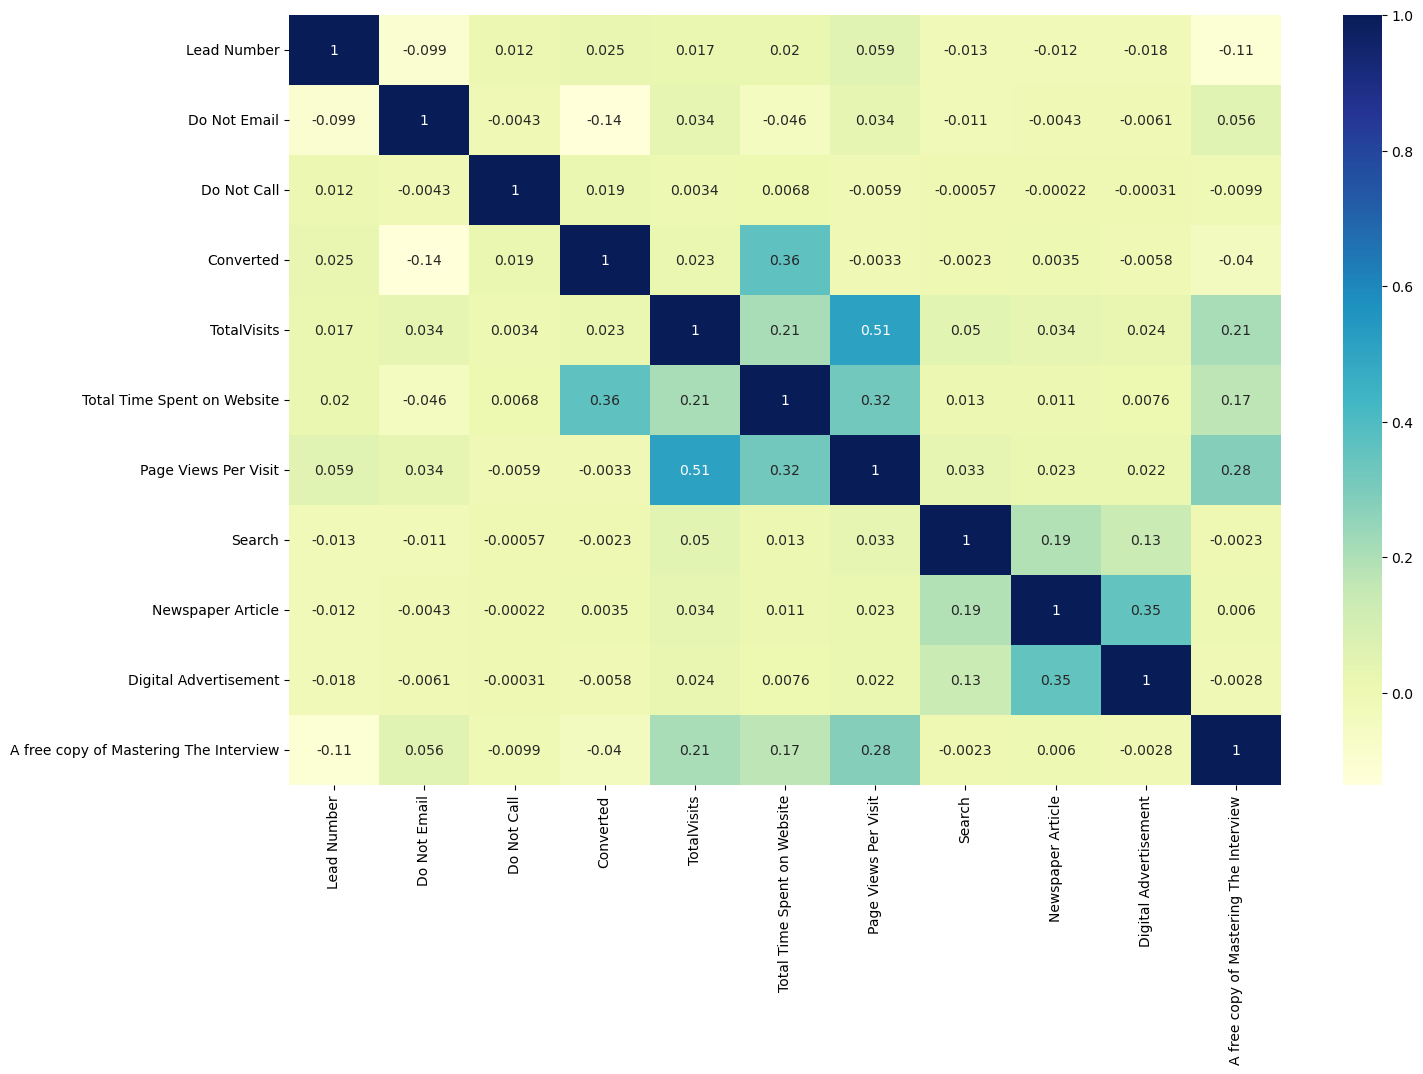

In [326]:
plt.figure(figsize = (16, 10))
sns.heatmap(leads_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [327]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Hear_Source', 'Occupation', 'City','Grouped_Specialization','Grouped_Lead_Source','Grouped_Last_Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)

In [328]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Number                                         9240 non-null   int64  
 1   Lead Origin                                         9240 non-null   object 
 2   Do Not Email                                        9240 non-null   int64  
 3   Do Not Call                                         9240 non-null   int64  
 4   Converted                                           9240 non-null   int64  
 5   TotalVisits                                         9240 non-null   int64  
 6   Total Time Spent on Website                         9240 non-null   int64  
 7   Page Views Per Visit                                9103 non-null   float64
 8   Hear_Source                                         9240 non-null   object 
 9

#### Dropping the repeated variables

In [331]:
# We have created dummies for the below variables, so we can drop them
leads_df.drop(['Lead Origin','Hear_Source','Occupation','City','Grouped_Specialization', 'Grouped_Lead_Source', 'Grouped_Last_Activity'],axis= 1,inplace=True)

In [332]:
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
0,660737,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,660728,0,0,0,5,674,2.5,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,660727,0,0,1,2,1532,2.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,660719,0,0,0,1,305,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,660681,0,0,1,2,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [333]:
# Checking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000
mean,3.394156,487.698268,2.362820
std,4.836682,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [334]:
# handling outlier for TotalVisits , rest looks fine
threshold = leads_df['TotalVisits'].quantile(0.99)
leads_df['TotalVisits'] = leads_df['TotalVisits'].clip(upper=threshold)

In [335]:
# Checking for outliers in the continuous variables
num_leads_df = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000
mean,3.283333,487.698268,2.362820
std,3.253250,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [338]:
#checking missing values
leads_df.isna().sum()/len(leads_df) * 100

Lead Number                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Search                                                0.0
Newspaper Article                                     0.0
Digital Advertisement                                 0.0
A free copy of Mastering The Interview                0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Origin_Quick Add Form                            0.0
Hear_Source_Email                                     0.0
Hear_Source_Multiple Sources                          0.0
Hear_Source_On

In [ ]:
# All null values handled

In [568]:
leads_df.set_index('Lead Number', inplace=True)

### Step 4: Test-Train Split

In [569]:
from sklearn.model_selection import train_test_split

In [571]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
660728,0,0,5,674,2.5,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
660727,0,0,2,1532,2.0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
660719,0,0,1,305,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
660681,0,0,2,1428,1.0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [572]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [573]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [574]:
from sklearn.preprocessing import MinMaxScaler

In [575]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Event Participation,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
Lead Number,,,,,,,,,,,,,,,,,,,,,
641410,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
597687,0,0,0.235294,0.214349,0.024182,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
626825,0,0,0.294118,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
587928,0,0,0.294118,0.541373,0.090909,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
622366,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [576]:
### Checking the Conversion Rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

We have almost 38% churn rate

### Step 6: Looking at Correlations

In [577]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [357]:
correlation_matrix = leads_df.corr()

# Store the correlation matrix in a DataFrame
correlation_df = pd.DataFrame(correlation_matrix)

# Save the DataFrame to an Excel file
correlation_df.to_excel("correlation_matrix.xlsx", index=True)

In [273]:
#dropping correleated columns

In [578]:
X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'] ,axis=1,inplace=True)
X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1,inplace=True)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

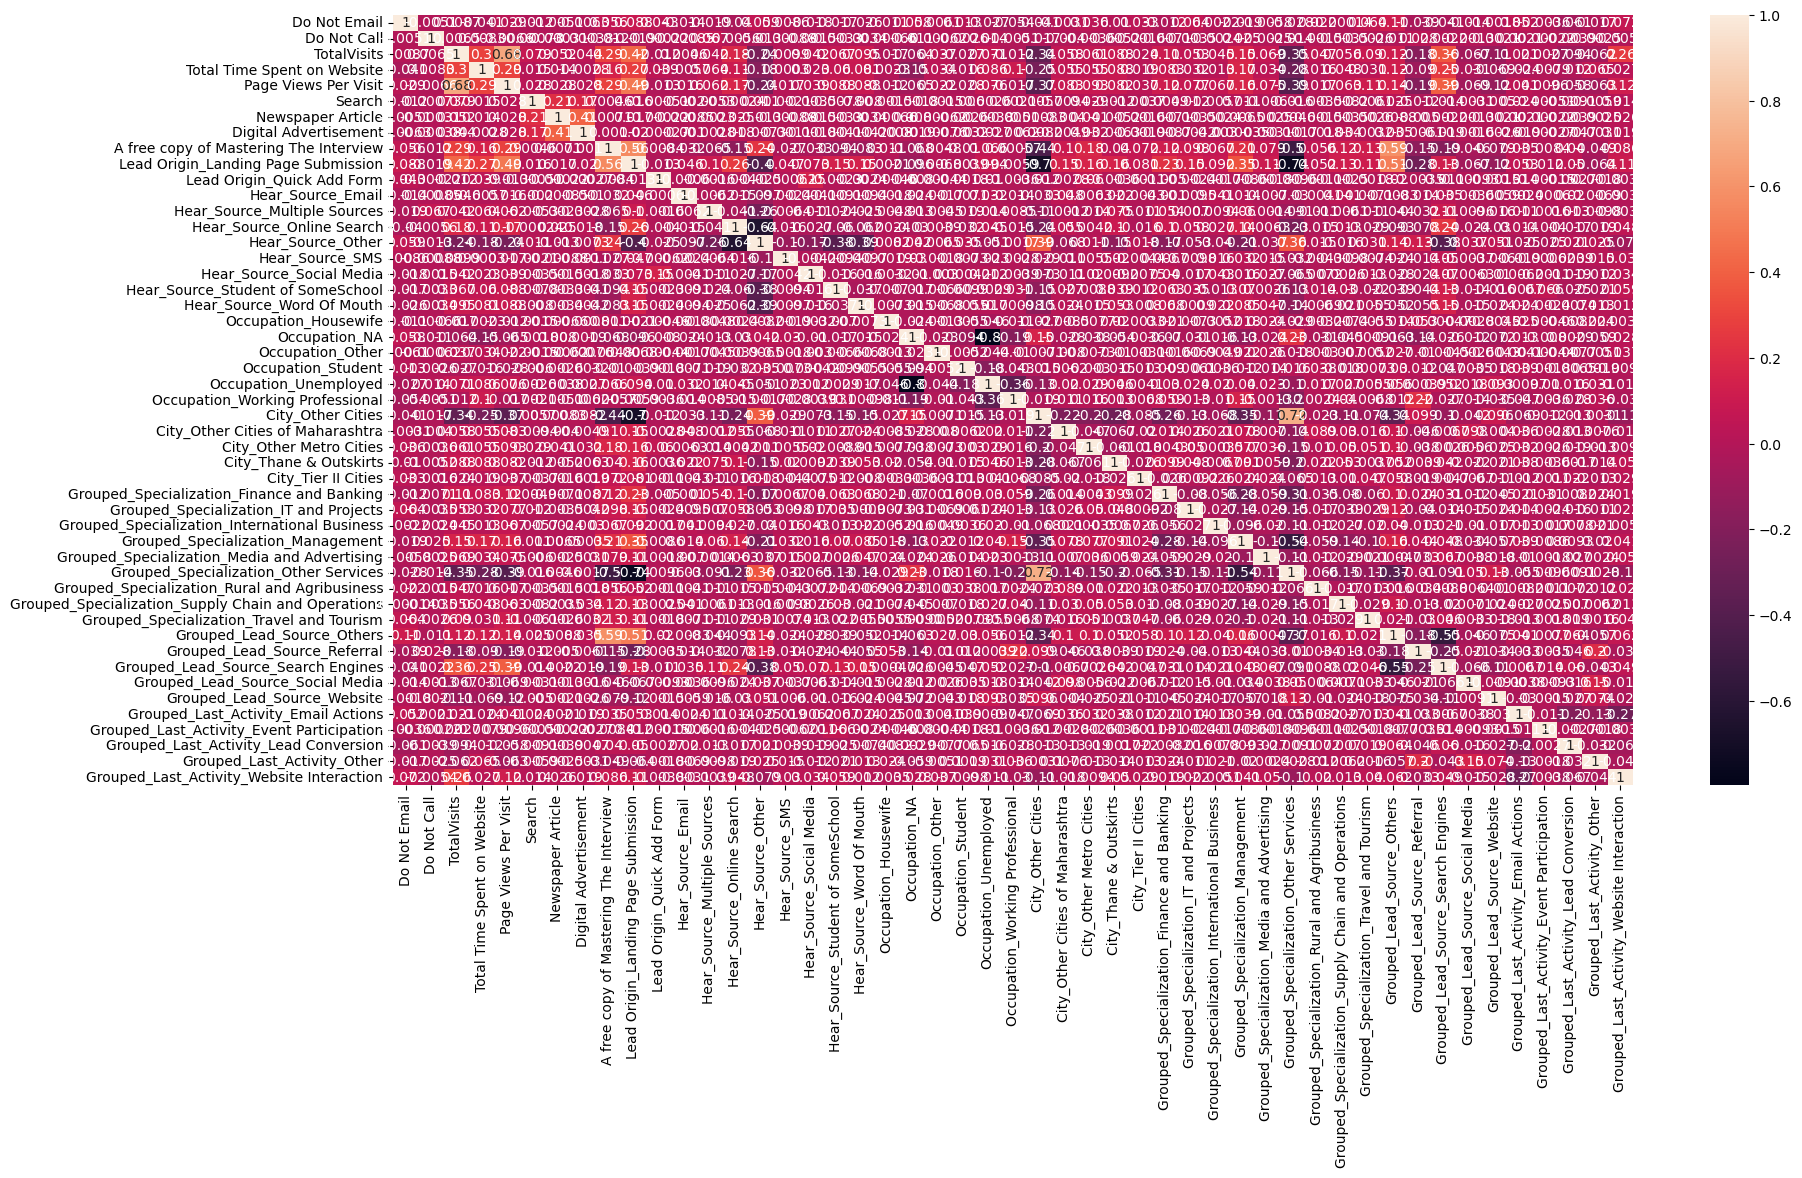

In [359]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [641]:
import statsmodels.api as sm

In [642]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Mon, 15 Jan 2024   Deviance:                       5545.9
Time:                        22:53:08   Pearson chi2:                 6.85e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3762
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  0.8690      1.061      0.819      0.413      -1.210       2.948
Do Not Email                                          -1.1439      0.160     -7.153      0.000      -1.457      -0.830
Do Not Call                                           21.5823   5.61e+04      0.000      1.000    -1.1e+05     1.1e+05
TotalVisits                                            1.0800      0.255      4.235      0.000       0.580       1.580
Total Time Spent on Website                            4.2592      0.163     26.116      0.000       3.940       4.579
Page Views Per Visit                                  -7.8308      1.416     -5.531      0.000     -10.605      -5.056
Search                                                 0.4813      0.792      0.608      0.543      -1.071       2.034
Newspaper Article                                     23.6342   3.52e+04      0.001      0.999   -6.91e+04    6.91e+04
Digital Advertisement                                -44.5237   4.98e+04     -0.001      0.999   -9.77e+04    9.76e+04
A free copy of Mastering The Interview                -0.3028      0.122     -2.482      0.013      -0.542      -0.064
Lead Origin_Landing Page Submission                   -1.0696      0.147     -7.271      0.000      -1.358      -0.781
Lead Origin_Quick Add Form                            20.4522   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Hear_Source_Email                                      0.8705      0.731      1.191      0.234      -0.562       2.303
Hear_Source_Multiple Sources                          -0.6264      0.459     -1.366      0.172      -1.525       0.272
Hear_Source_Online Search                             -0.0985      0.391     -0.252      0.801      -0.865       0.668
Hear_Source_Other                                     -0.1141      0.392     -0.291      0.771      -0.882       0.654
Hear_Source_SMS                                       -0.7129      0.933     -0.764      0.445      -2.542       1.117
Hear_Source_Social Media                               0.0674      0.525      0.128      0.898      -0.961       1.096
Hear_Source_Student of SomeSchool                     -0.0404      0.416     -0.097      0.923      -0.857       0.776
Hear_Source_Word Of Mouth                              0.0117      0.411      0.028      0.977      -0.793       0.817
Occupation_Housewife                                  24.0421   2.31e+04      0.001      0.999   -4.53e+04    4.53e+04
Occupation_NA                                         -0.9664      0.952     -1.015      0.310      -2.833       0.900
Occupation_Other                                      -0.3653      1.285     -0.284      0.776      -2.884  

In [456]:
#Looking at the above , there are many insignificant features , where p-value > 0.05

### Step 8: Feature Selection Using RFE

In [643]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [644]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 40 variables as output
rfe = rfe.fit(X_train, y_train)

In [645]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 13),
 ('Newspaper Article', True, 1),
 ('Digital Advertisement', False, 2),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 22),
 ('Hear_Source_Email', True, 1),
 ('Hear_Source_Multiple Sources', False, 4),
 ('Hear_Source_Online Search', False, 24),
 ('Hear_Source_Other', False, 23),
 ('Hear_Source_SMS', False, 7),
 ('Hear_Source_Social Media', False, 18),
 ('Hear_Source_Student of SomeSchool', False, 28),
 ('Hear_Source_Word Of Mouth', False, 19),
 ('Occupation_Housewife', True, 1),
 ('Occupation_NA', True, 1),
 ('Occupation_Other', False, 3),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 10),
 ('Occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 14),
 ('City_Other 

In [646]:
col = X_train.columns[rfe.support_]

In [647]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Newspaper Article',
       'Lead Origin_Landing Page Submission', 'Hear_Source_Email',
       'Occupation_Housewife', 'Occupation_NA',
       'Occupation_Working Professional',
       'Grouped_Specialization_Other Services', 'Grouped_Lead_Source_Others',
       'Grouped_Lead_Source_Referral', 'Grouped_Lead_Source_Search Engines',
       'Grouped_Lead_Source_Social Media', 'Grouped_Lead_Source_Website',
       'Grouped_Last_Activity_Email Actions',
       'Grouped_Last_Activity_Lead Conversion', 'Grouped_Last_Activity_Other',
       'Grouped_Last_Activity_Website Interaction'],
      dtype='object')

In [648]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Digital Advertisement',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Hear_Source_Multiple Sources', 'Hear_Source_Online Search',
       'Hear_Source_Other', 'Hear_Source_SMS', 'Hear_Source_Social Media',
       'Hear_Source_Student of SomeSchool', 'Hear_Source_Word Of Mouth',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Grouped_Specialization_Finance and Banking',
       'Grouped_Specialization_IT and Projects',
       'Grouped_Specialization_International Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media and Advertising',
       'Grouped_Specialization_Rural and Agribusiness',
       'Grouped_Specialization_Supply Chain and Operations',
       'Grouped_Specialization_Travel and Tourism',
 

##### Assessing the model with StatsModels

In [649]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.4
Date:                Mon, 15 Jan 2024   Deviance:                       5584.7
Time:                        22:53:25   Pearson chi2:                 6.94e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.6119      0.130      4.721      0.000       0.358       0.866
Do Not Email                                 -1.1298      0.158     -7.148      0.000      -1.440      -0.820
TotalVisits                                   1.0086      0.250      4.033      0.000       0.519       1.499
Total Time Spent on Website                   4.2202      0.161     26.200      0.000       3.904       4.536
Page Views Per Visit                         -7.7624      1.401     -5.541      0.000     -10.508      -5.016
Newspaper Article                             1.6044      1.421      1.129      0.259      -1.180       4.389
Lead Origin_Landing Page Submission          -1.0165      0.130     -7.837      0.000      -1.271      -0.762
Hear_Source_Email                             1.0530      0.627      1.680      0.093      -0.176       2.282
Occupation_Housewife                         22.6317   1.42e+04      0.002      0.999   -2.79e+04    2.79e+04
Occupation_NA                                -1.2816      0.085    -15.124      0.000      -1.448      -1.116
Occupation_Working Professional               2.4480      0.189     12.938      0.000       2.077       2.819
Grouped_Specialization_Other Services        -1.1837      0.116    -10.218      0.000      -1.411      -0.957
Grouped_Lead_Source_Others                   -0.5240      0.143     -3.657      0.000      -0.805      -0.243
Grouped_Lead_Source_Referral                  1.4078      0.159      8.869      0.000       1.097       1.719
Grouped_Lead_Source_Search Engines           -0.3315      0.127     -2.605      0.009      -0.581      -0.082
Grouped_Lead_Source_Social Media             -1.0336      0.510     -2.027      0.043      -2.033      -0.034
Grouped_Lead_Source_Website                   4.0504      0.524      7.734      0.000       3.024       5.077
Grouped_Last_Activity_Email Actions          -0.8398      0.072    -11.624      0.000      -0.981      -0.698
Grouped_Last_Activity_Lead Conversion        -2.3062      0.225    -10.242      0.000      -2.747      -1.865
Grouped_Last_Activity_Other                  -1.1372      0.294     -3.873      0.000      -1.713      -0.562
Grouped_Last_Activity_Website Interaction    -1.5375      0.145    -10.601      0.000      -1.822      -1.253
=============================================================================================================
"""

In [650]:
#further dropping unwanted features with P-value

col = col.drop(['Newspaper Article','Hear_Source_Email','Occupation_Housewife'], 1)
col


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Occupation_NA', 'Occupation_Working Professional',
       'Grouped_Specialization_Other Services', 'Grouped_Lead_Source_Others',
       'Grouped_Lead_Source_Referral', 'Grouped_Lead_Source_Search Engines',
       'Grouped_Lead_Source_Social Media', 'Grouped_Lead_Source_Website',
       'Grouped_Last_Activity_Email Actions',
       'Grouped_Last_Activity_Lead Conversion', 'Grouped_Last_Activity_Other',
       'Grouped_Last_Activity_Website Interaction'],
      dtype='object')

In [651]:
#Assissing model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.4
Date:                Mon, 15 Jan 2024   Deviance:                       5600.8
Time:                        22:53:36   Pearson chi2:                 6.94e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3709
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.6119      0.129      4.727      0.000       0.358       0.866
Do Not Email                                 -1.1397      0.158     -7.217      0.000      -1.449      -0.830
TotalVisits                                   0.9938      0.250      3.981      0.000       0.504       1.483
Total Time Spent on Website                   4.2087      0.161     26.190      0.000       3.894       4.524
Page Views Per Visit                         -7.8051      1.401     -5.571      0.000     -10.551      -5.059
Lead Origin_Landing Page Submission          -0.9989      0.129     -7.719      0.000      -1.253      -0.745
Occupation_NA                                -1.2860      0.085    -15.191      0.000      -1.452      -1.120
Occupation_Working Professional               2.4349      0.189     12.879      0.000       2.064       2.805
Grouped_Specialization_Other Services        -1.1848      0.116    -10.243      0.000      -1.411      -0.958
Grouped_Lead_Source_Others                   -0.5291      0.143     -3.696      0.000      -0.810      -0.248
Grouped_Lead_Source_Referral                  1.4203      0.158      8.964      0.000       1.110       1.731
Grouped_Lead_Source_Search Engines           -0.3242      0.127     -2.551      0.011      -0.573      -0.075
Grouped_Lead_Source_Social Media             -1.0342      0.509     -2.031      0.042      -2.032      -0.036
Grouped_Lead_Source_Website                   4.0482      0.524      7.730      0.000       3.022       5.075
Grouped_Last_Activity_Email Actions          -0.8307      0.072    -11.518      0.000      -0.972      -0.689
Grouped_Last_Activity_Lead Conversion        -2.3049      0.225    -10.239      0.000      -2.746      -1.864
Grouped_Last_Activity_Other                  -1.1340      0.293     -3.877      0.000      -1.707      -0.561
Grouped_Last_Activity_Website Interaction    -1.5185      0.144    -10.521      0.000      -1.801      -1.236
=============================================================================================================
"""

In [652]:
y_train

Lead Number
641410    0
597687    0
626825    0
587928    0
622366    0
         ..
656685    1
659710    1
588165    1
596447    0
606685    0
Name: Converted, Length: 6468, dtype: int64

In [653]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.445516
597687    0.120857
626825    0.219311
587928    0.491291
622366    0.197253
613574    0.985952
628456    0.186637
588051    0.993933
649586    0.211291
592598    0.876611
dtype: float64

In [654]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44551637, 0.12085722, 0.21931059, 0.49129059, 0.19725284,
       0.98595242, 0.18663683, 0.99393306, 0.21129066, 0.87661142])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [655]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.445516,641410
1,0,0.120857,597687
2,0,0.219311,626825
3,0,0.491291,587928
4,0,0.197253,622366


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [656]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.445516,641410,0
1,0,0.120857,597687,0
2,0,0.219311,626825,0
3,0,0.491291,587928,0
4,0,0.197253,622366,0


In [657]:
from sklearn import metrics

In [658]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3580  422]
 [ 810 1656]]


In [659]:
# Predicted     not_churn    churn
# Actual
# not_churn        3580      422
# churn            810       1656  

In [660]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8095238095238095


#### Checking VIFs

In [661]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [662]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,6.12
10,Grouped_Lead_Source_Search Engines,5.52
3,Page Views Per Visit,4.81
8,Grouped_Lead_Source_Others,4.65
1,TotalVisits,4.26
2,Total Time Spent on Website,2.24
7,Grouped_Specialization_Other Services,2.10
13,Grouped_Last_Activity_Email Actions,1.98
5,Occupation_NA,1.55
16,Grouped_Last_Activity_Website Interaction,1.31


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [663]:
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Occupation_NA',
       'Occupation_Working Professional',
       'Grouped_Specialization_Other Services', 'Grouped_Lead_Source_Others',
       'Grouped_Lead_Source_Referral', 'Grouped_Lead_Source_Search Engines',
       'Grouped_Lead_Source_Social Media', 'Grouped_Lead_Source_Website',
       'Grouped_Last_Activity_Email Actions',
       'Grouped_Last_Activity_Lead Conversion', 'Grouped_Last_Activity_Other',
       'Grouped_Last_Activity_Website Interaction'],
      dtype='object')

In [664]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2830.9
Date:                Mon, 15 Jan 2024   Deviance:                       5661.8
Time:                        22:54:37   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3649
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.1478      0.112      1.317      0.188      -0.072       0.368
Do Not Email                                 -1.1718      0.156     -7.512      0.000      -1.477      -0.866
TotalVisits                                   0.9789      0.249      3.934      0.000       0.491       1.467
Total Time Spent on Website                   4.2468      0.160     26.487      0.000       3.933       4.561
Page Views Per Visit                         -9.5357      1.395     -6.834      0.000     -12.271      -6.801
Occupation_NA                                -1.3261      0.084    -15.755      0.000      -1.491      -1.161
Occupation_Working Professional               2.4743      0.186     13.295      0.000       2.110       2.839
Grouped_Specialization_Other Services        -0.6171      0.087     -7.069      0.000      -0.788      -0.446
Grouped_Lead_Source_Others                   -0.9717      0.132     -7.358      0.000      -1.231      -0.713
Grouped_Lead_Source_Referral                  1.5617      0.155     10.091      0.000       1.258       1.865
Grouped_Lead_Source_Search Engines           -0.5591      0.124     -4.525      0.000      -0.801      -0.317
Grouped_Lead_Source_Social Media             -0.9561      0.495     -1.931      0.053      -1.926       0.014
Grouped_Lead_Source_Website                   3.9449      0.523      7.545      0.000       2.920       4.970
Grouped_Last_Activity_Email Actions          -0.8070      0.072    -11.276      0.000      -0.947      -0.667
Grouped_Last_Activity_Lead Conversion        -2.3304      0.225    -10.362      0.000      -2.771      -1.890
Grouped_Last_Activity_Other                  -1.1374      0.290     -3.920      0.000      -1.706      -0.569
Grouped_Last_Activity_Website Interaction    -1.4899      0.143    -10.419      0.000      -1.770      -1.210
=============================================================================================================
"""

In [665]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [666]:
y_train_pred[:10]

array([0.3409148 , 0.20785064, 0.22728926, 0.66636266, 0.21818087,
       0.98715072, 0.22042643, 0.99200694, 0.23930489, 0.85886215])

In [667]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [668]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.340915,641410,0
1,0,0.207851,597687,0
2,0,0.227289,626825,0
3,0,0.666363,587928,1
4,0,0.218181,622366,0


In [669]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8047309833024119


Let's check the VIFs again


In [670]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.68
9,Grouped_Lead_Source_Search Engines,4.28
1,TotalVisits,4.25
7,Grouped_Lead_Source_Others,2.75
2,Total Time Spent on Website,2.24
12,Grouped_Last_Activity_Email Actions,1.95
6,Grouped_Specialization_Other Services,1.57
4,Occupation_NA,1.51
15,Grouped_Last_Activity_Website Interaction,1.31
8,Grouped_Lead_Source_Referral,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [672]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3570,  432],
       [ 831, 1635]])

In [673]:
# Actual/Predicted     not_churn    churn
        # not_churn        3570      432
        # churn            831       1635  

In [674]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8047309833024119

## Metrics beyond simply accuracy

In [675]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [676]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6630170316301703

In [677]:
# Let us calculate specificity
TN / float(TN+FP)

0.8920539730134932

In [678]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10794602698650675


In [679]:
# positive predictive value 
print (TP / float(TP+FP))

0.7910014513788098


In [680]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8111792774369462


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [681]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [682]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

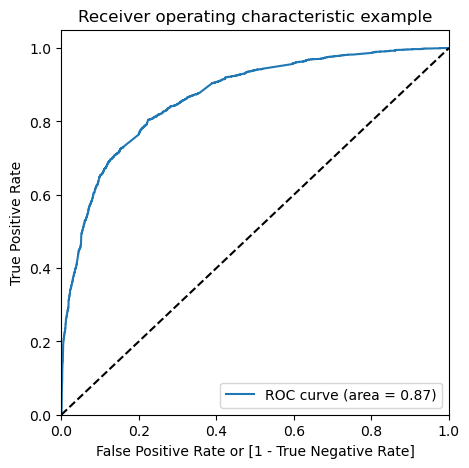

In [684]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [685]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.340915,641410,0,1,1,1,1,0,0,0,0,0,0
1,0,0.207851,597687,0,1,1,1,0,0,0,0,0,0,0
2,0,0.227289,626825,0,1,1,1,0,0,0,0,0,0,0
3,0,0.666363,587928,1,1,1,1,1,1,1,1,0,0,0
4,0,0.218181,622366,0,1,1,1,0,0,0,0,0,0,0


In [686]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.573748  0.971614  0.328586
0.2   0.2  0.710421  0.913220  0.585457
0.3   0.3  0.771336  0.826440  0.737381
0.4   0.4  0.801020  0.723439  0.848826
0.5   0.5  0.804731  0.663017  0.892054
0.6   0.6  0.792981  0.584347  0.921539
0.7   0.7  0.776438  0.501217  0.946027
0.8   0.8  0.739487  0.363341  0.971264
0.9   0.9  0.700216  0.228710  0.990755


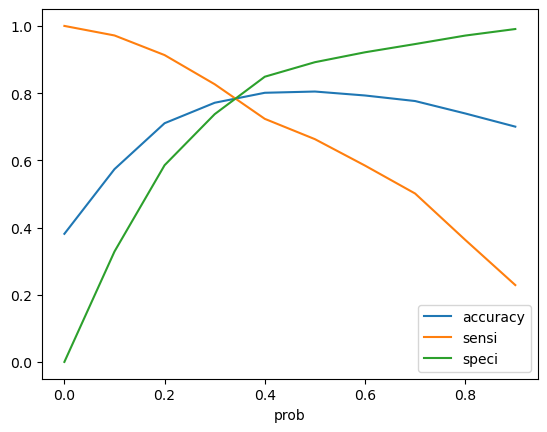

In [687]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [688]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.340915,641410,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.207851,597687,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.227289,626825,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.666363,587928,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.218181,622366,0,1,1,1,0,0,0,0,0,0,0,0


In [689]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7713358070500927

In [690]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2951, 1051],
       [ 428, 2038]])

In [691]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [692]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8264395782643957

In [693]:
# Let us calculate specificity
TN / float(TN+FP)

0.7373813093453273

In [694]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.26261869065467264


In [695]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6597604402719327


In [696]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8733353063036401


## Precision and Recall

In [697]:
#Looking at the confusion matrix again

In [699]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3570,  432],
       [ 831, 1635]])

##### Precision
TP / TP + FP

In [700]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7910014513788098

##### Recall
TP / TP + FN

In [701]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6630170316301703

Using sklearn utilities for the same

##### Recall
TP / TP + FN

In [702]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6630170316301703

Using sklearn utilities for the same

In [703]:
from sklearn.metrics import precision_score, recall_score

In [540]:
?precision_score

In [704]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7910014513788098

In [705]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6630170316301703

### Precision and recall tradeoff

In [546]:
from sklearn.metrics import precision_recall_curve

In [706]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [707]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

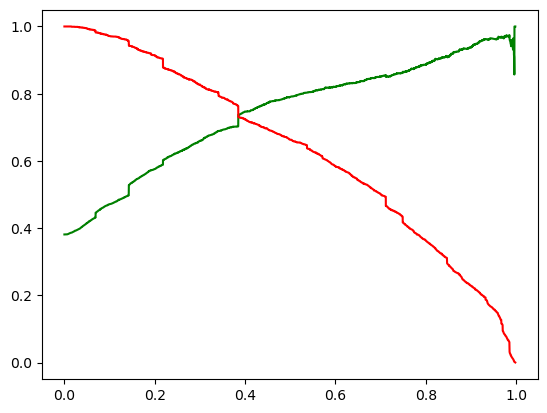

In [708]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [709]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [710]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation_NA,Occupation_Working Professional,Grouped_Specialization_Other Services,Grouped_Lead_Source_Others,Grouped_Lead_Source_Referral,Grouped_Lead_Source_Search Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website,Grouped_Last_Activity_Email Actions,Grouped_Last_Activity_Lead Conversion,Grouped_Last_Activity_Other,Grouped_Last_Activity_Website Interaction
Lead Number,,,,,,,,,,,,,,,,
619003,0,0.470588,0.444982,0.145455,1,0,1,1,0,0,0,0,0,0,0,0
636884,0,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,0,0,0
590281,0,0.294118,0.025968,0.090909,0,1,0,0,0,1,0,0,0,0,1,0
579892,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0
617929,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0,0,0


In [711]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [712]:
y_test_pred = res.predict(X_test_sm)

In [713]:
y_test_pred[:10]

Lead Number
619003    0.141413
636884    0.748835
590281    0.612266
579892    0.384790
617929    0.711453
579992    0.509473
643289    0.524033
581637    0.194382
588474    0.022485
609001    0.387079
dtype: float64

In [714]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [715]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
619003,0.141413
636884,0.748835
590281,0.612266
579892,0.384790
617929,0.711453


In [716]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [717]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [718]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [719]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [720]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,619003,0.141413
1,1,636884,0.748835
2,1,590281,0.612266
3,0,579892,0.384790
4,1,617929,0.711453


In [721]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [724]:
# Rearranging the columns
column_order = ['Lead Number', 'Converted', 'Converted_Prob']

# Reorder the columns
y_pred_final = y_pred_final[column_order]
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,619003,1,0.141413
1,636884,1,0.748835
2,590281,1,0.612266
3,579892,0,0.384790
4,617929,1,0.711453


In [725]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [726]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,619003,1,0.141413,0
1,636884,1,0.748835,1
2,590281,1,0.612266,1
3,579892,0,0.384790,0
4,617929,1,0.711453,1


In [728]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8026695526695526

In [729]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1442,  235],
       [ 312,  783]])

In [730]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [731]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7150684931506849

In [732]:
# Let us calculate specificity
TN / float(TN+FP)

0.8598688133571855